# Assignment 2

# Author: Peidong He

**Original Dataset Source: Barry Becker. (1994). Adult. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/2/adult**

Import necessary libraries

In [5]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Load the dataset

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# features 
print(X) 


       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

# 2. Take a quick look at the data structure

Use .head() to see first 5 rows of features

In [7]:
# First 5 rows of features
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Use .info() method to see a concise summary of a DataFrame.

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


Use .describe() method to see a summary of the numerical attributes.

In [9]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
X.shape

(48842, 14)

## 2.1 Plot a histogram of the data.

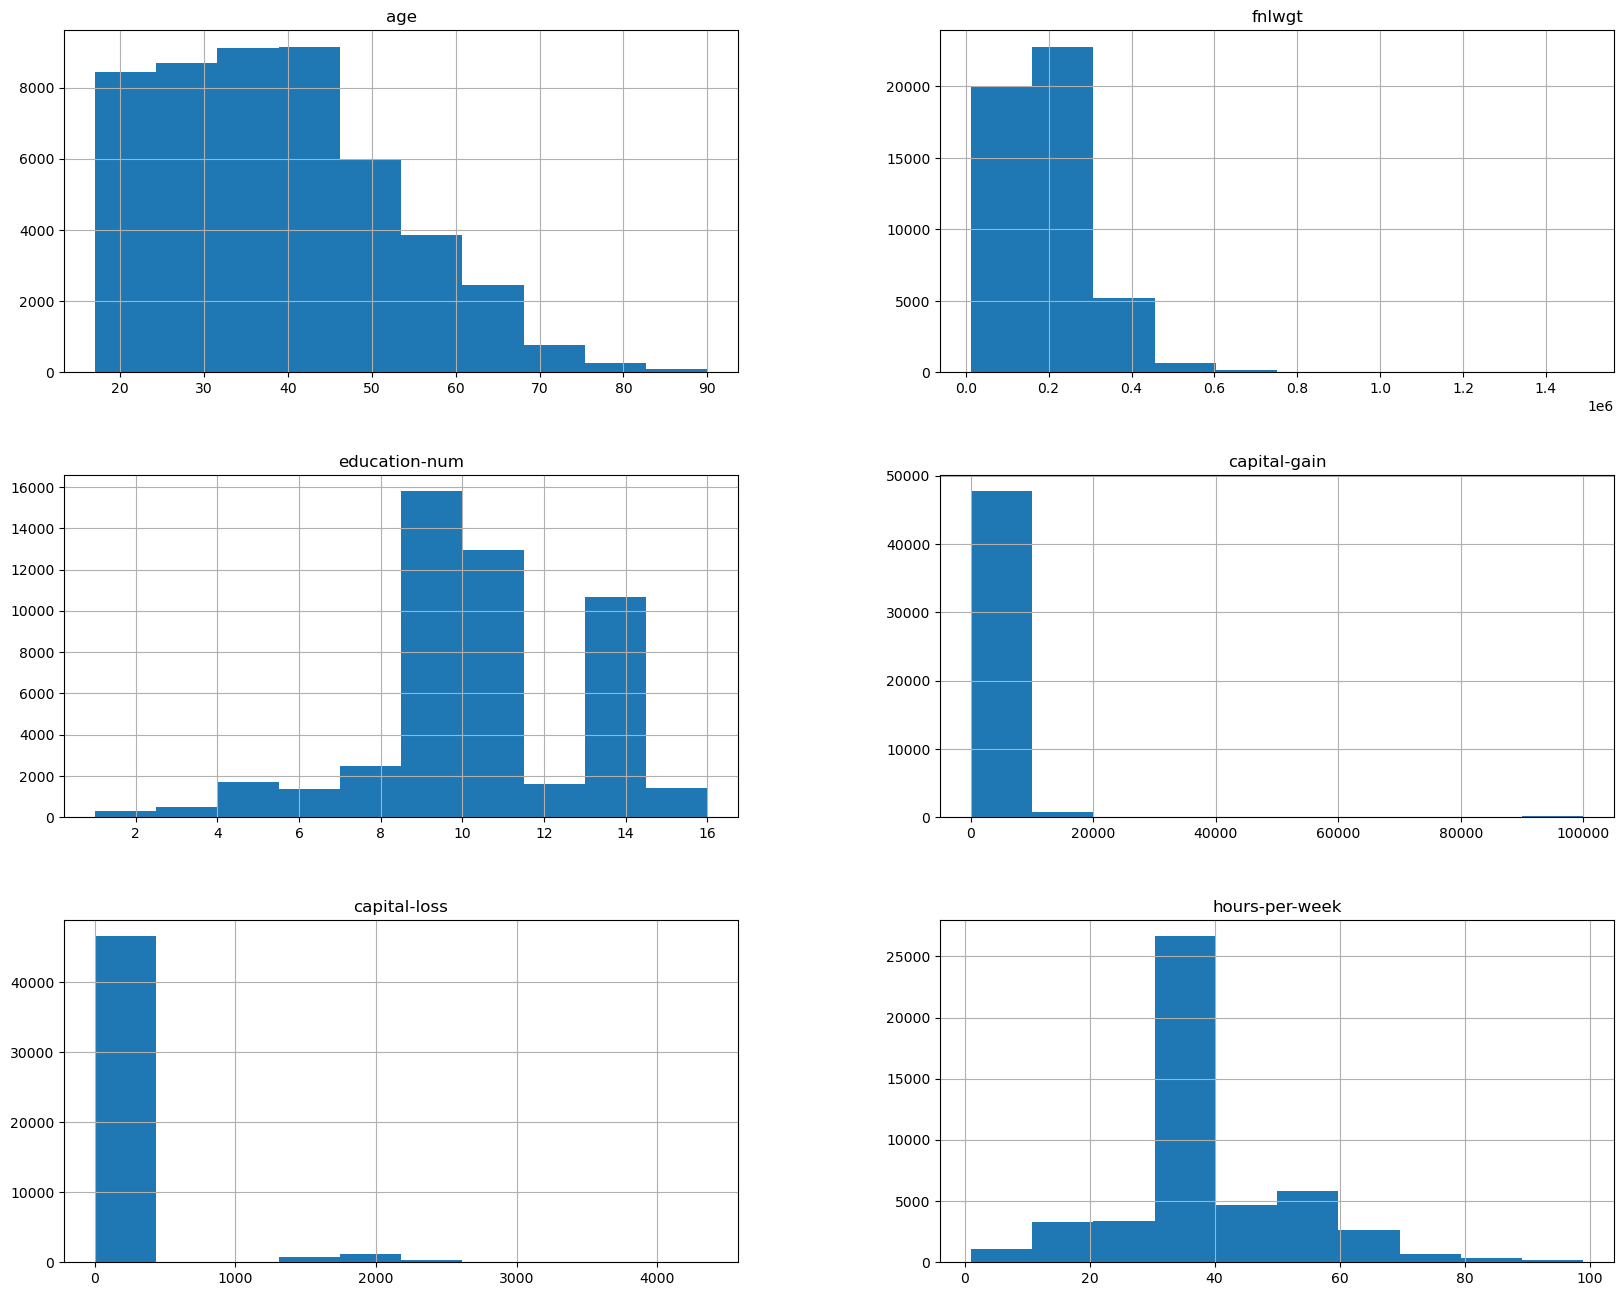

In [11]:
X.hist(figsize=(20,16))
plt.show()

# 3. Check for missing values

In [12]:
# Find the number of missing values in each column
X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

# 4. Replace the missing values 

In [13]:
# replaces all occurrences of '?' in X with NaN (Not a Number) values from the NumPy library
X.replace('?', np.nan, inplace=True)
# Before the replacement, the question marks ('?') are treated as regular string values by pandas, not as missing values. Therefore, the number of Non-Null should decrease
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


/var/folders/0_/4t1jg30s73z6wsgyl0zf21nh0000gn/T/ipykernel_62485/2450799501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


# 5. Create and apply a preprocessing pipeline

Import necessary libraries for pipeline

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



In [15]:
# Create the cat and num columns
# Get a list of column names from the 'X' DataFrame that are of numerical data types.
# Get a list of column names from the 'X' DataFrame that are not of numerical data types.

num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )


Display the pipeline

In [16]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

Apply the preprocessing pipeline on the dataset

In [17]:
# Apply the preprocessing transformations to the features 'X'.
# This includes scaling, encoding categorical variables, imputation, etc.
X_prepared = preprocessing.fit_transform(X)

# add column headers back.
feature_names=preprocessing.get_feature_names_out()

# Create a new DataFrame from the transformed data 'X_prepared'.
# Assign the feature names to the columns of this new DataFrame
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared.shape

(48842, 105)

# 6. Check the target value_counts. 

Check the target value_counts

In [18]:
y["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

# 7. Remove the period at the end of the >50K. and <=50K

In [19]:
# We will replace ' <=50K.' with ' <=50K' and ' >50K.' with ' >50K' to standardize the data.
y['income'] = y['income'].replace('<=50K.', '<=50K')
y['income'] = y['income'].replace('>50K.', '>50K')

print(y['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


/var/folders/0_/4t1jg30s73z6wsgyl0zf21nh0000gn/T/ipykernel_62485/1254461500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace('<=50K.', '<=50K')
/var/folders/0_/4t1jg30s73z6wsgyl0zf21nh0000gn/T/ipykernel_62485/1254461500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace('>50K.', '>50K')


# 8. Split the data into 80% training set and 20% testing set, print the shape

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


# 9. Train a svm model (svc) to predict if the income of the adult exceeds 50K

Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model model_svm.

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model_svm = SVC(kernel='poly', C=0.1, gamma=1)

# train on the first 10,000 examples only:
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

## 9.1 Test your model on the X_Test, and report the classification_report on the y_test and y_predict 

In [26]:
y_predict=model_svm.predict(X_test)
print(f'classification_report for C = 0.1')
print (classification_report(y_test, y_predict))

classification_report for C = 0.1
              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



## 9.2 Display the confusion matrix of the test results

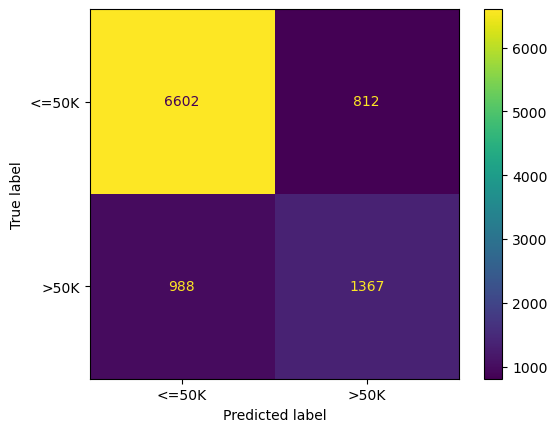

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# 10.  Use GridSearchCV to find the best value of kernel, gamma, and C

## 10.1 Split the dataset into 60% training, 20% validation, and 20% testing

In [29]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 14) (29305, 1) (9768, 14) (9768, 1) (9769, 14) (9769, 1)


## 10.2 Pass the hyperparameters for the GridSearchCV to find the best ones

In [33]:
# code author luisguiserrano 

from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())





ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Self-emp-inc'

--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peidonghe/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Local-gov'


## 10.3 Check the svm winner parameters using svm_winner

In [32]:
svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'